In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras import models
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error

In [2]:
PAMP = pd.read_csv('./Data/Argentina - Pampa Energia SA (PAMP).csv')
BEEF = pd.read_csv('./Data/Brazil - Minerva SA_Brazil (BEEF3).csv')
CCB = pd.read_csv('./Data/Colombia - Cementos Argos SA (CCB).csv')
MNHD = pd.read_csv('./Data/Egypt - Medinet Nasr Housing (MNHD).csv')
SBER = pd.read_csv('./Data/Russia - Sberbank Rossii PAO (SBER).csv')
IMPJ = pd.read_csv('./Data/South Africa - Impala Platinum Holdings Ltd (IMPJ).csv')
DSMC = pd.read_csv('./Data/South Korea - Dongkuk Steel Mill Co Ltd (001230).csv')
KCHOL = pd.read_csv('./Data/Turkey - Koc Holding AS (KCHOL).csv')

In [3]:
PAMP

,Date,Price,Open,High,Low,Vol.,Change %
0,"Mar 31, 2021",85.15,86.5,88.1,85.15,564.30K,-1.10%
1,"Mar 30, 2021",86.1,85.15,86.75,84.6,141.40K,1.29%
2,"Mar 29, 2021",85,80,86,79,371.22K,3.85%
3,"Mar 26, 2021",81.85,84,84.6,80.7,462.55K,-2.09%
4,"Mar 25, 2021",83.6,85.2,87.3,82.1,389.78K,-3.13%
...,...,...,...,...,...,...,...
296,"Jan 07, 2020",47.6,48.35,49,46.9,901.95K,-1.86%
297,"Jan 06, 2020",48.5,48.4,48.7,47,719.24K,-0.61%
298,"Jan 03, 2020",48.8,48.25,49.45,46.5,595.36K,1.14%
299,"Jan 02, 2020",48.25,49.35,50.2,47.55,878.50K,-2.92%


In [4]:
PAMP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      301 non-null    object
 1   Price     301 non-null    object
 2   Open      301 non-null    object
 3   High      301 non-null    object
 4   Low       301 non-null    object
 5   Vol.      300 non-null    object
 6   Change %  300 non-null    object
dtypes: object(7)
memory usage: 16.6+ KB


In [5]:
## drop last row because it doesn't contain relevant information

PAMP.drop(300, inplace=True)

In [6]:
## change date column to datetime

PAMP['Date'] = pd.to_datetime(PAMP['Date'], format='%b %d, %Y')

In [7]:
## change price columns to integer

PAMP['Price'] = pd.to_numeric(PAMP['Price'])
PAMP['Open'] = pd.to_numeric(PAMP['Open'])
PAMP['High'] = pd.to_numeric(PAMP['High'])
PAMP['Low'] = pd.to_numeric(PAMP['Low'])

In [8]:
PAMP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      300 non-null    datetime64[ns]
 1   Price     300 non-null    float64       
 2   Open      300 non-null    float64       
 3   High      300 non-null    float64       
 4   Low       300 non-null    float64       
 5   Vol.      300 non-null    object        
 6   Change %  300 non-null    object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 18.8+ KB


In [9]:
PAMP.sort_values(['Date'], ascending=True, ignore_index=True, inplace=True)
PAMP

,Date,Price,Open,High,Low,Vol.,Change %
0,2020-01-02,48.25,49.35,50.20,47.55,878.50K,-2.92%
1,2020-01-03,48.80,48.25,49.45,46.50,595.36K,1.14%
2,2020-01-06,48.50,48.40,48.70,47.00,719.24K,-0.61%
3,2020-01-07,47.60,48.35,49.00,46.90,901.95K,-1.86%
4,2020-01-08,46.50,47.50,47.50,46.00,1.18M,-2.31%
...,...,...,...,...,...,...,...
295,2021-03-25,83.60,85.20,87.30,82.10,389.78K,-3.13%
296,2021-03-26,81.85,84.00,84.60,80.70,462.55K,-2.09%
297,2021-03-29,85.00,80.00,86.00,79.00,371.22K,3.85%
298,2021-03-30,86.10,85.15,86.75,84.60,141.40K,1.29%


In [10]:
## find rows for 2021 data

PAMP.loc[PAMP['Date'] > '2020-12-31']

,Date,Price,Open,High,Low,Vol.,Change %
240,2021-01-04,76.70,76.90,78.10,76.00,463.28K,-0.26%
241,2021-01-05,78.30,76.65,78.90,76.20,500.06K,2.09%
242,2021-01-06,78.00,77.60,78.90,77.00,175.53K,-0.38%
243,2021-01-07,79.95,76.60,80.40,76.60,414.26K,2.50%
244,2021-01-08,79.00,79.45,79.90,76.30,836.37K,-1.19%
245,2021-01-11,75.50,76.70,77.20,73.80,251.45K,-4.43%
246,2021-01-12,76.00,74.55,78.00,73.20,436.60K,0.66%
247,2021-01-13,77.50,76.05,78.00,75.50,253.17K,1.97%
248,2021-01-14,77.00,78.00,78.50,75.80,741.08K,-0.65%
249,2021-01-15,78.10,77.10,78.10,75.40,353.31K,1.43%


In [11]:
## split training data and testing data, testing data will be the year of 2021

training_data = PAMP[['Date', 'Price']][:240]
testing_data = PAMP[['Date', 'Price']][240:]

## Daily

In [12]:
def get_train_data(data, window_size):
    
    X, y = [], []
    
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i])
        y.append(data[i])
    
    return np.array(X), np.array(y)

In [ ]:
def get_test_data(data, scaler, window_size):
    raw = data['Price'][len(data) - len(testing_data) - window_size:].values
    raw = raw.reshape(-1, 1)
    raw = scaler.transform(raw)
    
    X, y = [], []
    
    for i in range(window_size, raw.shape[0]):
        X.append(raw[i-window_size:i, 0])
        y.append(raw[i])
        
    X = np.array(X)
    
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))
    
    return X, y

In [13]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(PAMP[['Price']])
scaled_train_data = scaled_data[:240]
scaled_test_data = scaled_data[240:]

In [14]:
X_train, y_train = get_train_data(scaled_train_data, 10)
X_testx, y_testx = get_test_data(scaled_test_data, 10)

In [15]:
inputs = tf.keras.Input(shape=(X_train.shape[1], 1))
x = layers.LSTM(units=50, return_sequences=True)(inputs)
x = layers.Dropout(0.2)(x)
x = layers.LSTM(units=50)(x)
x = layers.Dropout(0.2)(x)
output = layers.Dense(1, activation='linear')(x)

model = tf.keras.Model(inputs=inputs, outputs=output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 10, 1)]           0         
                                                                 
 lstm (LSTM)                 (None, 10, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 10, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 30,651
Trainable params: 30,651
Non-trainable p

In [16]:
model.compile(loss='mean_squared_error', 
              optimizer=tf.keras.optimizers.Adam(lr=.01, decay=0.01))

history = model.fit(X_train, y_train, epochs=200)

Epoch 1/200


C:\Users\Chris\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


8/8 [==============================] - 3s 9ms/step - loss: 0.1146
Epoch 2/200
8/8 [==============================] - 0s 8ms/step - loss: 0.0349
Epoch 3/200
8/8 [==============================] - 0s 8ms/step - loss: 0.0160
Epoch 4/200
8/8 [==============================] - 0s 8ms/step - loss: 0.0072
Epoch 5/200
8/8 [==============================] - 0s 7ms/step - loss: 0.0069
Epoch 6/200
8/8 [==============================] - 0s 7ms/step - loss: 0.0065
Epoch 7/200
8/8 [==============================] - 0s 8ms/step - loss: 0.0071
Epoch 8/200
8/8 [==============================] - 0s 7ms/step - loss: 0.0073
Epoch 9/200
8/8 [==============================] - 0s 7ms/step - loss: 0.0077
Epoch 10/200
8/8 [==============================] - 0s 8ms/step - loss: 0.0081
Epoch 11/200
8/8 [==============================] - 0s 8ms/step - loss: 0.0080
Epoch 12/200
8/8 [==============================] - 0s 8ms/step - loss: 0.0063
Epoch 13/200
8/8 [==============================] - 0s 8ms/step - loss: 0

8/8 [==============================] - 0s 7ms/step - loss: 0.0033
Epoch 105/200
8/8 [==============================] - 0s 7ms/step - loss: 0.0031
Epoch 106/200
8/8 [==============================] - 0s 8ms/step - loss: 0.0035
Epoch 107/200
8/8 [==============================] - 0s 7ms/step - loss: 0.0031
Epoch 108/200
8/8 [==============================] - 0s 8ms/step - loss: 0.0043
Epoch 109/200
8/8 [==============================] - 0s 7ms/step - loss: 0.0031
Epoch 110/200
8/8 [==============================] - 0s 7ms/step - loss: 0.0033
Epoch 111/200
8/8 [==============================] - 0s 7ms/step - loss: 0.0029
Epoch 112/200
8/8 [==============================] - 0s 7ms/step - loss: 0.0037
Epoch 113/200
8/8 [==============================] - 0s 7ms/step - loss: 0.0034
Epoch 114/200
8/8 [==============================] - 0s 7ms/step - loss: 0.0040
Epoch 115/200
8/8 [==============================] - 0s 7ms/step - loss: 0.0035
Epoch 116/200
8/8 [==============================] - 0

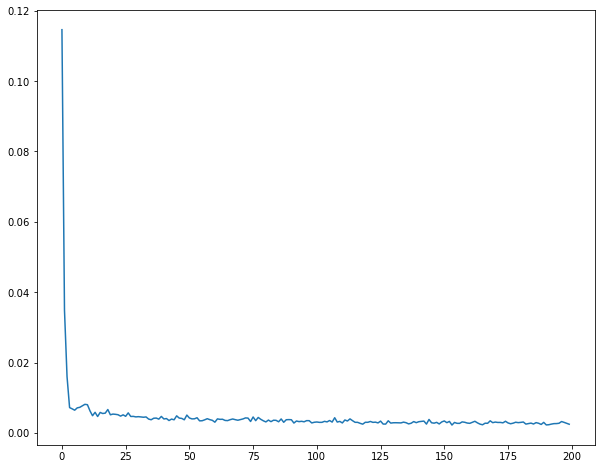

In [17]:
plt.figure(figsize=(10, 8))
plt.plot(history.history['loss'], label='training loss')

In [18]:
def get_test_data(data, scaler, window_size):
    raw = data['Price'][len(data) - len(testing_data) - window_size:].values
    raw = raw.reshape(-1, 1)
    raw = scaler.transform(raw)
    
    X_test = []
    
    for i in range(window_size, raw.shape[0]):
        X_test.append(raw[i-window_size:i, 0])
        
    X_test = np.array(X_test)
    
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    
    return X_test

In [19]:
X_test = get_test_data(PAMP, scaler, 10)

In [20]:
y_test = []

for i in range(240, len(PAMP)):
    y_test.append(PAMP['Price'][i])
    
y_test = np.array(y_test)

In [21]:
y_test.reshape(-1, 1)

array([[76.7 ],
       [78.3 ],
       [78.  ],
       [79.95],
       [79.  ],
       [75.5 ],
       [76.  ],
       [77.5 ],
       [77.  ],
       [78.1 ],
       [77.5 ],
       [78.8 ],
       [80.5 ],
       [76.3 ],
       [74.8 ],
       [75.  ],
       [80.2 ],
       [80.6 ],
       [83.  ],
       [79.  ],
       [81.  ],
       [80.6 ],
       [80.  ],
       [83.65],
       [84.5 ],
       [85.  ],
       [85.5 ],
       [84.4 ],
       [83.3 ],
       [85.2 ],
       [88.4 ],
       [85.4 ],
       [85.5 ],
       [82.5 ],
       [81.4 ],
       [82.  ],
       [79.  ],
       [77.8 ],
       [80.  ],
       [79.5 ],
       [79.2 ],
       [82.  ],
       [82.5 ],
       [80.7 ],
       [82.  ],
       [82.5 ],
       [84.  ],
       [86.6 ],
       [88.2 ],
       [87.7 ],
       [88.5 ],
       [88.  ],
       [88.15],
       [88.9 ],
       [86.3 ],
       [83.6 ],
       [81.85],
       [85.  ],
       [86.1 ],
       [85.15]])

In [22]:
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
testing_data['Predicted_Price'] = pred_price

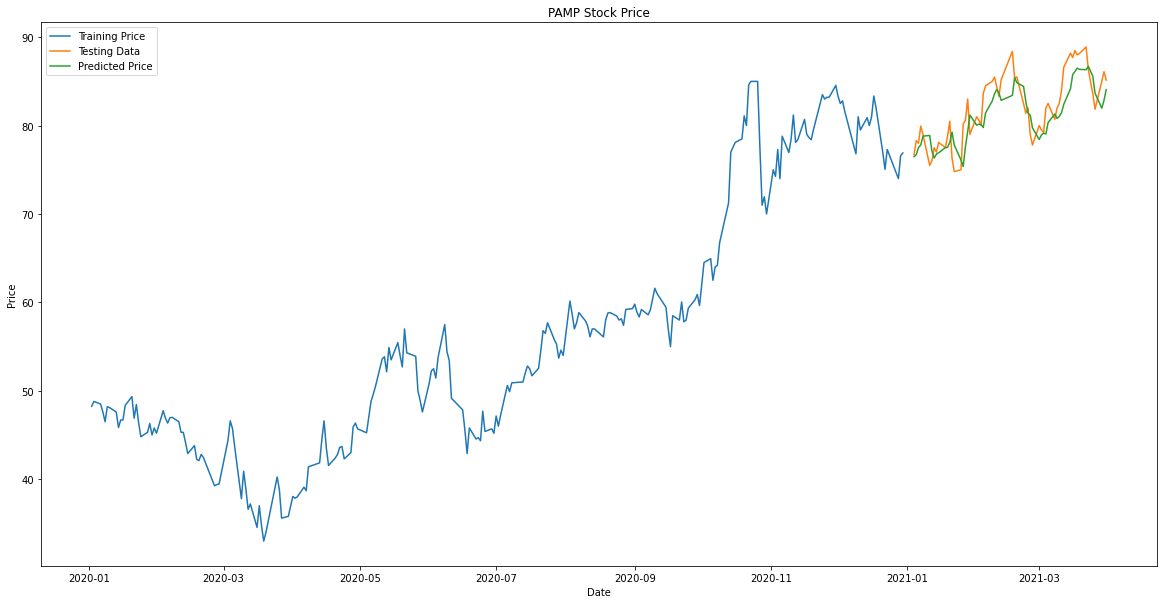

In [23]:
plt.figure(figsize=(20, 10))

plt.plot(training_data['Date'], training_data['Price'], label='Training Price')
plt.plot(testing_data['Date'], testing_data['Price'], label='Testing Data')
plt.plot(testing_data['Date'], testing_data['Predicted_Price'], label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('PAMP Stock Price')
plt.legend()
plt.show()

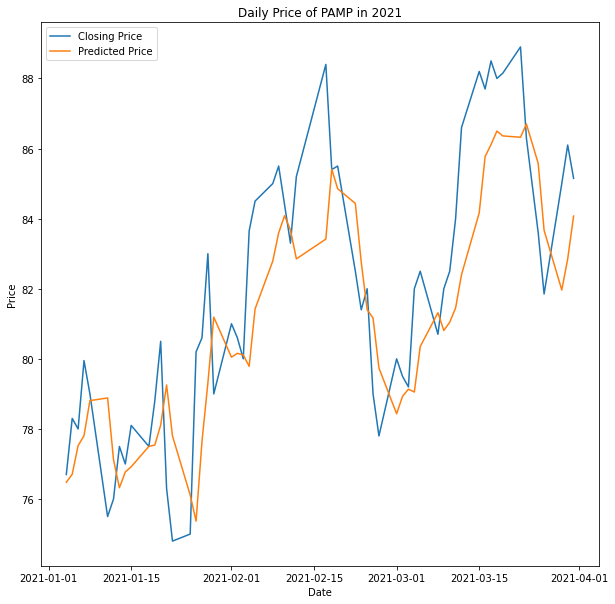

In [24]:
plt.figure(figsize=(10, 10))
plt.plot(testing_data['Date'], testing_data['Price'], label='Closing Price')
plt.plot(testing_data['Date'], testing_data['Predicted_Price'], label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Daily Price of PAMP in 2021')
plt.legend()
plt.show()

Either have an output for the 7 days of the week or have an output and use previous day's prediction as well

## Weekly

In [25]:
def get_weekly_train_data(data, window_size):
    
    X, y = [], []
    
    for i in range(window_size, len(data), 5):
        X.append(data[i-window_size:i])
        y.append(data[i:i+5])
    
    return np.array(X), np.array(y)

In [26]:
X_train_w, y_train_w = get_weekly_train_data(scaled_train_data, 10)

In [27]:
inputs = tf.keras.Input(shape=(X_train_w.shape[1], 1))
x = layers.LSTM(units=50, return_sequences=True)(inputs)
x = layers.Dropout(0.2)(x)
x = layers.LSTM(units=50)(x)
x = layers.Dropout(0.2)(x)
output = layers.Dense(5, activation='linear')(x)

model = tf.keras.Model(inputs=inputs, outputs=output)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 10, 1)]           0         
                                                                 
 lstm_2 (LSTM)               (None, 10, 50)            10400     
                                                                 
 dropout_2 (Dropout)         (None, 10, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_3 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 5)                 255       
                                                                 
Total params: 30,855
Trainable params: 30,855
Non-trainable

In [28]:
model.compile(loss='mean_squared_error', 
              optimizer=tf.keras.optimizers.Adam(lr=.01, decay=0.01))

history = model.fit(X_train_w, y_train_w, epochs=200)

Epoch 1/200


C:\Users\Chris\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


2/2 [==============================] - 3s 11ms/step - loss: 0.1774
Epoch 2/200
2/2 [==============================] - 0s 9ms/step - loss: 0.0450
Epoch 3/200
2/2 [==============================] - 0s 9ms/step - loss: 0.0372
Epoch 4/200
2/2 [==============================] - 0s 9ms/step - loss: 0.0328
Epoch 5/200
2/2 [==============================] - 0s 10ms/step - loss: 0.0216
Epoch 6/200
2/2 [==============================] - 0s 8ms/step - loss: 0.0212
Epoch 7/200
2/2 [==============================] - 0s 8ms/step - loss: 0.0189
Epoch 8/200
2/2 [==============================] - 0s 8ms/step - loss: 0.0166
Epoch 9/200
2/2 [==============================] - 0s 9ms/step - loss: 0.0154
Epoch 10/200
2/2 [==============================] - 0s 7ms/step - loss: 0.0146
Epoch 11/200
2/2 [==============================] - 0s 7ms/step - loss: 0.0122
Epoch 12/200
2/2 [==============================] - 0s 8ms/step - loss: 0.0132
Epoch 13/200
2/2 [==============================] - 0s 8ms/step - loss:

2/2 [==============================] - 0s 7ms/step - loss: 0.0066
Epoch 105/200
2/2 [==============================] - 0s 8ms/step - loss: 0.0081
Epoch 106/200
2/2 [==============================] - 0s 8ms/step - loss: 0.0070
Epoch 107/200
2/2 [==============================] - 0s 8ms/step - loss: 0.0076
Epoch 108/200
2/2 [==============================] - 0s 8ms/step - loss: 0.0078
Epoch 109/200
2/2 [==============================] - 0s 8ms/step - loss: 0.0064
Epoch 110/200
2/2 [==============================] - 0s 9ms/step - loss: 0.0054
Epoch 111/200
2/2 [==============================] - 0s 8ms/step - loss: 0.0089
Epoch 112/200
2/2 [==============================] - 0s 8ms/step - loss: 0.0063
Epoch 113/200
2/2 [==============================] - 0s 8ms/step - loss: 0.0060
Epoch 114/200
2/2 [==============================] - 0s 8ms/step - loss: 0.0070
Epoch 115/200
2/2 [==============================] - 0s 7ms/step - loss: 0.0074
Epoch 116/200
2/2 [==============================] - 0

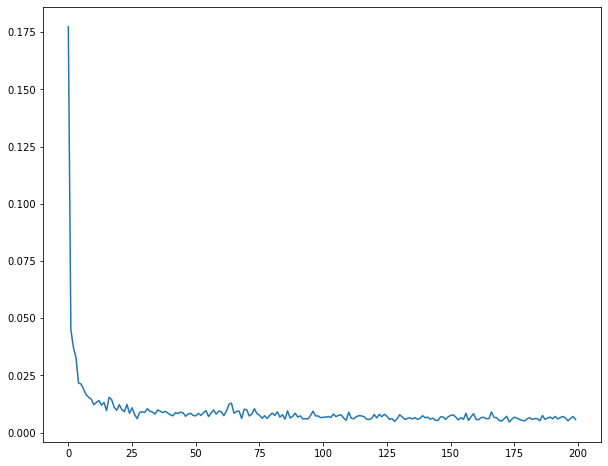

In [29]:
plt.figure(figsize=(10, 8))
plt.plot(history.history['loss'], label='training loss')

In [30]:
y_test_w = []

for i in range(240, len(PAMP), 5):
    y_test_w.append(PAMP['Price'][i:i+5])
    
y_test_w = np.array(y_test_w)

In [31]:
def get_weekly_test_data(data, scaler, window_size):
    raw = data['Price'][len(data) - len(testing_data) - window_size:].values
    raw = raw.reshape(-1, 1)
    raw = scaler.transform(raw)
    
    X_test = []
    
    for i in range(window_size, raw.shape[0], 5):
        X_test.append(raw[i-window_size:i, 0])
        
    X_test = np.array(X_test)
    
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
    
    return X_test

In [32]:
X_test_w = get_weekly_test_data(PAMP, scaler, 10)

In [33]:
pred_price = model.predict(X_test_w)
pred_price = scaler.inverse_transform(pred_price)

train_pred_price = model.predict(X_train_w)
train_pred_price = scaler.inverse_transform(train_pred_price)

In [34]:
trainScore = np.sqrt(mean_squared_error(scaler.inverse_transform(y_train_w[:,:,0]), train_pred_price))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(y_test_w, pred_price))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 3.80 RMSE
Test Score: 3.08 RMSE


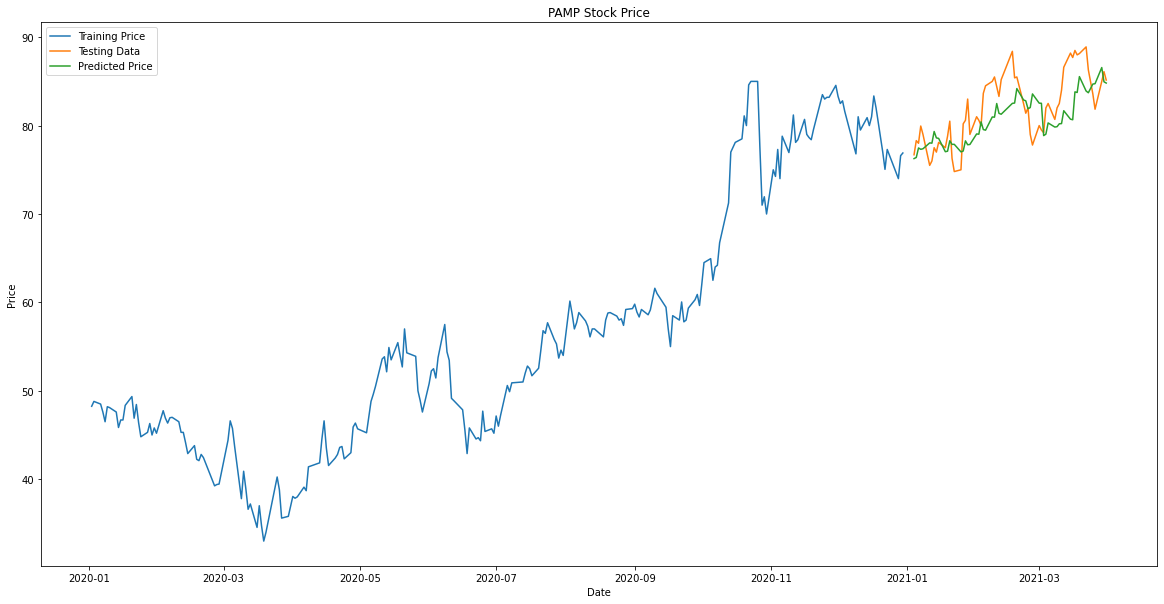

In [35]:
plt.figure(figsize=(20, 10))

plt.plot(training_data['Date'], training_data['Price'], label='Training Price')
plt.plot(testing_data['Date'], testing_data['Price'], label='Testing Data')
plt.plot(testing_data['Date'], pred_price.flatten(), label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('PAMP Stock Price')
plt.legend()
plt.show()

## PyTorch

In [36]:
import torch
import torch.nn as nn

In [37]:
def split_data(stock, lookback):
    data_raw = stock.to_numpy() # convert to numpy array
    data = []
    
    # create all possible sequences of length seq_len
    for index in range(len(data_raw) - lookback): 
        data.append(data_raw[index: index + lookback])

    data = np.array(data)
    test_set_size = 60
    train_set_size = data.shape[0] - (test_set_size)
    
    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]
    
    x_test = data[train_set_size:,:-1]
    y_test = data[train_set_size:,-1,:]
    
    return [x_train, y_train, x_test, y_test]

In [38]:
price = PAMP[['Price']]
price['Price'] = scaler.transform(price['Price'].values.reshape(-1, 1))
price

C:\Users\Chris\AppData\Local\Temp/ipykernel_15008/3439380683.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price['Price'] = scaler.transform(price['Price'].values.reshape(-1, 1))


,Price
0,0.272809
1,0.282648
2,0.277281
3,0.261181
4,0.241503
...,...
295,0.905188
296,0.873882
297,0.930233
298,0.949911


In [39]:
X_train, y_train, X_test, y_test = split_data(price, 14)

In [100]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [101]:
X_train = torch.from_numpy(X_train).type(torch.Tensor)
X_test = torch.from_numpy(X_test).type(torch.Tensor)
y_train = torch.from_numpy(y_train).type(torch.Tensor)
y_test = torch.from_numpy(y_test).type(torch.Tensor)

In [102]:
class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTM, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)   
        
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        out = self.fc(out[:, -1, :]) 
        return out

In [103]:
model = LSTM(input_dim=1, hidden_dim=50, output_dim=1, num_layers=2)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

In [104]:
print(model)

LSTM(
  (lstm): LSTM(1, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)


In [105]:
num_epochs = 200

hist = np.zeros(num_epochs)
lstm = []
for t in range(num_epochs):
    y_train_pred = model(X_train)    
    
    loss = criterion(y_train_pred, y_train)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()    
    
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

Epoch  0 MSE:  0.1936083734035492
Epoch  1 MSE:  0.07280280441045761
Epoch  2 MSE:  0.1601894497871399
Epoch  3 MSE:  0.06152667477726936
Epoch  4 MSE:  0.06680075824260712
Epoch  5 MSE:  0.08011002093553543
Epoch  6 MSE:  0.08489563316106796
Epoch  7 MSE:  0.08246768265962601
Epoch  8 MSE:  0.07568779587745667
Epoch  9 MSE:  0.0668138712644577
Epoch  10 MSE:  0.05780792608857155
Epoch  11 MSE:  0.051033709198236465
Epoch  12 MSE:  0.0495532751083374
Epoch  13 MSE:  0.05395178496837616
Epoch  14 MSE:  0.055670615285634995
Epoch  15 MSE:  0.049985915422439575
Epoch  16 MSE:  0.04264334961771965
Epoch  17 MSE:  0.03811117261648178
Epoch  18 MSE:  0.03598271310329437
Epoch  19 MSE:  0.03381188586354256
Epoch  20 MSE:  0.028907813131809235
Epoch  21 MSE:  0.019492274150252342
Epoch  22 MSE:  0.010717758908867836
Epoch  23 MSE:  0.018504248932003975
Epoch  24 MSE:  0.01288278866559267
Epoch  25 MSE:  0.008585522882640362
Epoch  26 MSE:  0.01351907942444086
Epoch  27 MSE:  0.0150668071582913

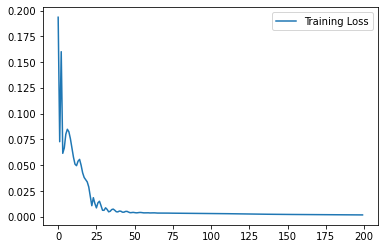

In [106]:
plt.plot(hist, label='Training Loss')
plt.legend()
plt.show()

In [108]:
y_test = y_test.reshape(-1, 1)

In [109]:
y_train_pred = model(X_train)
y_test_pred = model(X_test)

y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test.detach().numpy())

trainScore = np.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

AttributeError: 'numpy.ndarray' object has no attribute 'detach'

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

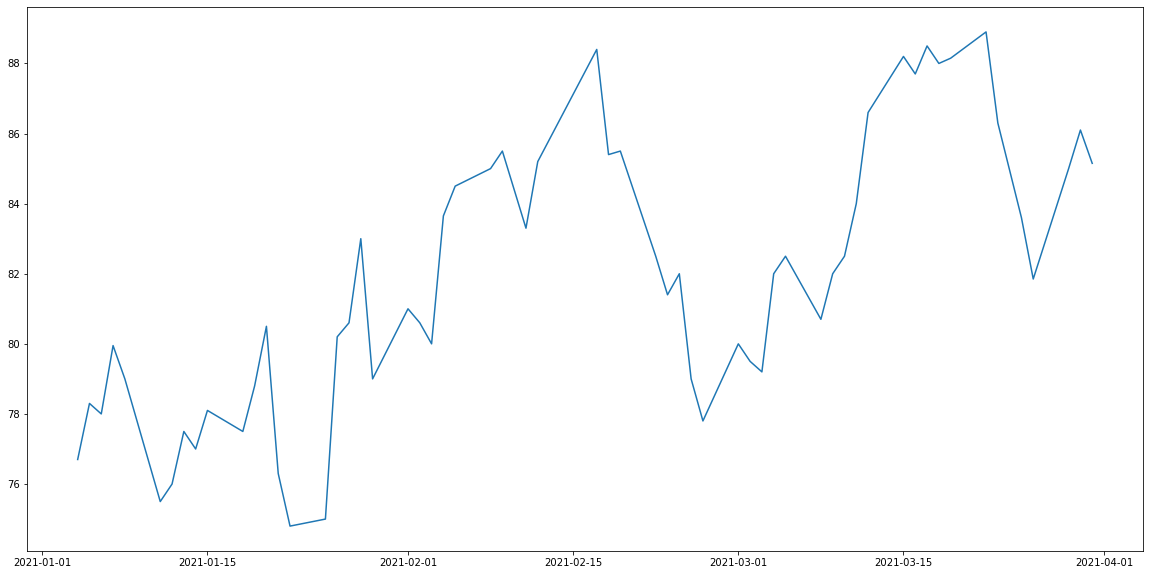

In [111]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], y_test, label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred, label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

## Weekly

In [53]:
model = LSTM(input_dim=1, hidden_dim=50, output_dim=5, num_layers=2)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

print(model)

NameError: name 'LSTM' is not defined

In [ ]:
num_epochs = 200

hist = np.zeros(num_epochs)
lstm = []
for t in range(num_epochs):
    y_train_pred = model(X_train)    
    
    loss = criterion(y_train_pred, y_train)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()    
    
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

In [ ]:
plt.plot(hist, label='Training Loss')
plt.legend()
plt.show()

In [ ]:
y_train_pred = model(X_train)
y_test_pred = model(X_test)

y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test.detach().numpy())

trainScore = np.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))